 
### Einfaches Beispiel: Regression

In [18]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

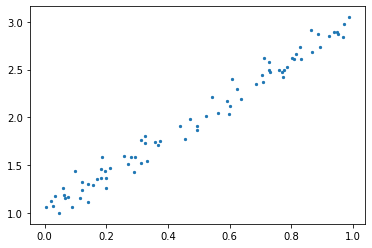

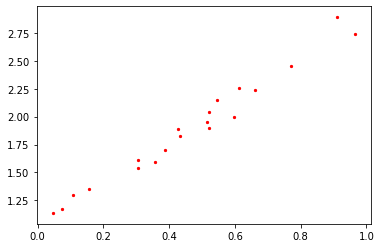

In [19]:
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

idx = np.arange(100)
np.random.shuffle(idx)

train_idx = idx[:80]
val_idx = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]
plt.scatter(x_train,y_train,s=5)
plt.show()

plt.scatter(x_val,y_val,s=5,c="r")
plt.show()

In [20]:
x = torch.from_numpy(x_train).float()
y = torch.from_numpy(y_train).float()

torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1, 1))
model.train()
print(*model.parameters())

lr = 1e-1
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')
n_epochs = 1000

for epoch in range(n_epochs):
    yhat = model(x)
    loss = loss_fn(y, yhat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
print(*model.parameters())

# evaluation
model.eval()
x = torch.from_numpy(x_val).float()
y = torch.from_numpy(y_val).float()

yhat = model(x)
val_loss = loss_fn(y, yhat)
print(val_loss.item())

Parameter containing:
tensor([[0.7645]], requires_grad=True) Parameter containing:
tensor([0.8300], requires_grad=True)
Parameter containing:
tensor([[1.9690]], requires_grad=True) Parameter containing:
tensor([1.0235], requires_grad=True)
0.00865846686065197


#### Einfache Regression mit Dataset und Minibatch

In [25]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)
train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1, 1))
model.train()


lr = 1e-1
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')
n_epochs = 1000

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        yhat = model(x_batch)
        loss = loss_fn(y_batch, yhat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
print(*model.parameters())

model.eval()

for x_val, y_val in val_loader:
    yhat = model(x_val)
    val_loss = loss_fn(y_val, yhat)
    print(val_loss.item())



Parameter containing:
tensor([[1.9583]], requires_grad=True) Parameter containing:
tensor([1.0189], requires_grad=True)
0.005680907983332872
